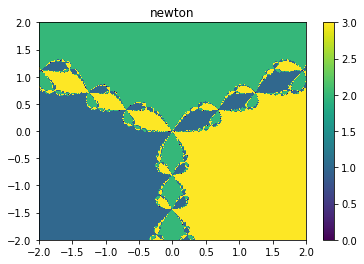

In [57]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import newton
from util import root_attraction, eps_eq
from math import sqrt

N = 1000
COUNT_ITERATION = 30
eps = 1e-15

f = lambda z : z ** 3 - 1
df = lambda z : 3 * z ** 2

roots = [
    complex(1, 0),
    complex(-1/2, sqrt(3)/2),
    complex(-1/2, -sqrt(3)/2),
]
assert all(map(lambda r: eps_eq(f(r), 0, eps), roots))

newton_method = lambda z: newton.get_root(f, df, z, COUNT_ITERATION)

# X, Y = np.mgrid[-2:2:complex(0, N), -2:2:complex(0, N)]
# Z = np.array([X.flatten(), Y.flatten()]).T.reshape(N, N, 2)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)

Z = np.array([
    root_attraction(x, y, method=newton_method, roots=roots, eps=eps) 
    for x in X for y in Y
]).reshape(N, N)

fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, Z)
ax.set_title('newton')
fig.colorbar(c, ax=ax)

plt.show()